# Multiple Linear Regression

In this notebook we will expand our simple linear regression model that we built to predict car prices in the last chapter to include several independent variables in order to produce better predictions.

### Package and Data Loading

As before, we will import the required packages and our car price data set.

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import statsmodels.api as stats
import numpy as np

In [2]:
carprice_df = pd.read_csv('CarPrice_Assignment.csv')

### Assessing the Data

In [3]:
carprice_df.shape

(205, 26)

In [4]:
carprice_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
carprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Here we are checking the number of unique values in specifically the categorical variables using df.select_dtypes()

In [9]:
carprice_df.select_dtypes(include = 'object').nunique()

CarName           147
fueltype            2
aspiration          2
doornumber          2
carbody             5
drivewheel          3
enginelocation      2
enginetype          7
cylindernumber      7
fuelsystem          8
dtype: int64

As we can see, the data contains a mixture of numeric types and categorical (object) types. We will remove the car_ID field from the data as this is only an identifier. For the purposes of this lesson we will also remove CarName from the data as it contains a large number of unique values (How could we extract more useful information from this variable?).

In [10]:
carprice_df = carprice_df.drop(columns=['car_ID', 'CarName'])

## Basic Multiple Regression Model

In [17]:
carprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [20]:
Y_basic = carprice_df['price']
X_basic = stats.add_constant(carprice_df[['enginesize', 'curbweight', 'peakrpm', 'citympg']])

In [21]:
model_basic = stats.OLS(Y_basic, X_basic)
results_basic = model_basic.fit()

We can see our results and the parameters for each of the independent variables using the .summary() attribute again.

In [23]:
print(results_basic.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     225.0
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           7.62e-73
Time:                        23:16:58   Log-Likelihood:                -1957.7
No. Observations:                 205   AIC:                             3925.
Df Residuals:                     200   BIC:                             3942.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.022e+04   5937.020     -5.090      0.0

## Full Multiple Regression Model

We can look at the correlations between different numerical variables in a handy way using a correlation matrix - this allows us to see the correlation between all pairs of variables at once. We can then remove some of the independent variables that are highly correlated and would cause problems with the algorithm due to multicollinearity. We can create this correlation matrix using the df.corr() method. We add a red/blue heatmap to better see where the extreme correlations are.

In [25]:
carprice_df.select_dtypes(exclude='object').corr().style.background_gradient(cmap = 'coolwarm')

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


In [26]:
carprice_df = carprice_df.drop(columns= ['carlength', 'carwidth', 'highwaympg'])

#### One Hot Encoding

In [27]:
dummy = pd.get_dummies(carprice_df.select_dtypes(include = 'object'), drop_first=True)

In [28]:
dummy

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,True,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,True,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,True,False,True,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,True,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
201,True,True,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
202,True,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
203,False,True,False,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False


In [29]:
carprice_df = pd.concat([carprice_df.select_dtypes(exclude='object'), dummy], axis=1)

In [30]:
carprice_df

,symboling,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,48.8,2548,130,3.47,2.68,9.0,111,5000,...,False,False,False,False,False,False,False,True,False,False
1,3,88.6,48.8,2548,130,3.47,2.68,9.0,111,5000,...,False,False,False,False,False,False,False,True,False,False
2,1,94.5,52.4,2823,152,2.68,3.47,9.0,154,5000,...,False,False,False,False,False,False,False,True,False,False
3,2,99.8,54.3,2337,109,3.19,3.40,10.0,102,5500,...,False,False,False,False,False,False,False,True,False,False
4,2,99.4,54.3,2824,136,3.19,3.40,8.0,115,5500,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,55.5,2952,141,3.78,3.15,9.5,114,5400,...,False,False,False,False,False,False,False,True,False,False
201,-1,109.1,55.5,3049,141,3.78,3.15,8.7,160,5300,...,False,False,False,False,False,False,False,True,False,False
202,-1,109.1,55.5,3012,173,3.58,2.87,8.8,134,5500,...,False,False,False,False,False,False,False,True,False,False
203,-1,109.1,55.5,3217,145,3.01,3.40,23.0,106,4800,...,False,False,False,False,False,True,False,False,False,False


We can repeat the above process where we remove highly correlated variables, now including the one hot encoded features.

In [31]:
carprice_df.corr().style.background_gradient(cmap='coolwarm')

,symboling,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
symboling,1.000000,-0.531954,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,-0.079978,0.194311,-0.059866,0.664073,0.168845,0.435648,-0.378341,-0.298243,0.102839,-0.076381,0.212471,0.009347,-0.133979,-0.082855,0.037513,-0.013597,0.245950,-0.090188,-0.034161,-0.000238,0.065707,-0.047012,0.245950,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
wheelbase,-0.531954,1.000000,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,0.577816,-0.308346,0.257611,-0.447357,-0.008608,-0.386094,0.291086,0.210899,-0.460355,0.498830,-0.187790,-0.004156,0.399603,-0.204037,-0.183195,0.166152,-0.081174,0.261182,-0.309492,0.145842,-0.120709,0.037803,-0.081174,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129
carheight,-0.541038,0.589435,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,0.119336,-0.284631,0.087311,-0.552208,-0.072328,-0.477476,0.235863,0.459148,-0.100273,0.039814,-0.106234,-0.092628,0.319687,0.036260,-0.046670,-0.065063,-0.238720,0.152982,0.059696,-0.049777,-0.015076,-0.170181,-0.238720,-0.079418,-0.206225,0.284631,-0.101245,0.108685,-0.278615,-0.066778
curbweight,-0.227691,0.776386,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,0.835305,-0.217275,0.324902,-0.197379,0.098956,-0.287501,0.099425,0.164075,-0.666039,0.669987,0.050468,0.109243,0.250124,-0.413293,-0.080295,0.400878,-0.039196,0.264554,-0.576463,0.405490,-0.143903,0.187964,-0.039196,-0.577159,-0.040801,0.217275,0.034431,0.520220,-0.002434,0.024052
enginesize,-0.105790,0.569329,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,0.874145,-0.069594,0.108217,-0.020742,0.239363,-0.216805,0.088459,-0.027518,-0.518391,0.565509,0.196826,0.128248,0.016063,-0.363334,-0.016508,0.562403,-0.184762,0.144878,-0.631431,0.511783,-0.111081,0.335555,-0.184762,-0.442562,-0.166946,0.069594,0.049033,0.483520,0.004490,-0.013327
boreratio,-0.130051,0.488750,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,0.553173,-0.054451,0.212614,-0.119258,0.208089,-0.227032,0.030517,0.105719,-0.583087,0.574105,0.185042,0.158136,0.181729,-0.410383,0.326798,0.119509,0.000127,-0.007797,-0.164076,0.128365,-0.108774,0.054482,0.000127,-0.353342,0.000110,0.054451,0.070030,0.419335,-0.004213,0.025977
stroke,-0.008735,0.160959,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,0.079443,-0.241829,0.222982,0.011082,0.043215,0.052316,0.035630,-0.095084,0.124397,-0.022325,-0.138455,-0.032545,-0.084688,0.366084,-0.522808,-0.044813,-0.000187,0.176485,-0.111046,0.068388,-0.050450,-0.110878,-0.000187,-0.234866,-0.000162,0.241829,0.144263,-0.110280,0.251259,-0.005688
compressionratio,-0.178515,0.249786,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.067984,-0.984356,0.295541,-0.177888,0.029623,-0.202650,0.188286,0.016315,-0.062683,0.105185,-0.019762,-0.002519,0.219153,0.027545,-0.084328,-0.086649,-0.026436,0.173360,-0.012522,-0.065559,-0.011354,0.023986,-0.026436,-0.183384,-0.022838,0.984356,-0.055528,-0.311035,-0.153726,-0.016654
horsepower,0.070873,0.353294,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,0.808139,0.163926,0.241685,0.126947,0.194801,-0.053770,-0.024097,-0.063081,-0.544438,0.57

In [32]:
carprice_df = carprice_df.drop(columns=['compressionratio', 'drivewheel_fwd', 'enginetype_rotor', 'fuelsystem_4bbl', 'fuelsystem_idi'])

In [33]:
carprice_df.shape

(205, 36)

### Test/Train Split

In [34]:
train_df = carprice_df.sample(frac = 0.7, random_state = 99) #random state is a seed value
test_df = carprice_df.drop(train_df.index)

In [52]:
train_df.shape

(144, 36)

In [53]:
test_df.shape

(61, 36)

### Fitting the Linear Regression Model

We once again use statsmodels to fit our linear regression model. We do this in the same way as the previous notebook except now our X_train contains all of our independent variables (plus the constant column).

In [69]:
Y_train = train_df.price
X_train_boolean = stats.add_constant(train_df.drop(columns = ['price']))

In [71]:
X_train = X_train_boolean.astype(int)

In [74]:
X_train

,const,symboling,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,horsepower,peakrpm,...,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
71,1,-1,115,56,3740,234,3,3,155,4750,...,0,0,0,0,0,0,0,1,0,0
24,1,1,93,50,1967,90,2,3,68,5500,...,1,0,0,0,0,1,0,0,0,0
51,1,1,93,54,1900,91,3,3,68,5000,...,1,0,0,0,0,1,0,0,0,0
162,1,0,95,52,2140,98,3,3,70,4800,...,1,0,0,0,0,1,0,0,0,0
97,1,1,94,53,2037,97,3,3,69,5200,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,1,3,91,49,3139,181,3,3,200,5200,...,0,1,0,0,0,0,0,1,0,0
29,1,3,95,50,2811,156,3,3,145,5000,...,1,0,0,0,0,0,1,0,0,0
109,1,0,114,58,3230,120,3,3,97,5000,...,1,0,0,0,0,0,0,1,0,0
122,1,1,93,50,2191,98,2,3,68,5500,...,1,0,0,0,0,1,0,0,0,0


In [76]:
model_carprice = stats.OLS(Y_train, X_train)
results_carprice = model_carprice.fit()

In [77]:
print(results_carprice.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     45.51
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           3.81e-50
Time:                        23:51:57   Log-Likelihood:                -1303.7
No. Observations:                 144   AIC:                             2677.
Df Residuals:                     109   BIC:                             2781.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.783e+

In [78]:
print('The sum of square residuals is {:.1f}'.format(results_carprice.ssr))

The sum of square residuals is 616497682.1


We can also use our test set to compare our predictions with the observed values.

In [79]:
Y_test = test_df.price
test_df = stats.add_constant(test_df)
X_test = test_df[X_train.columns]

In [80]:
test_predictions = results_carprice.predict(X_test)

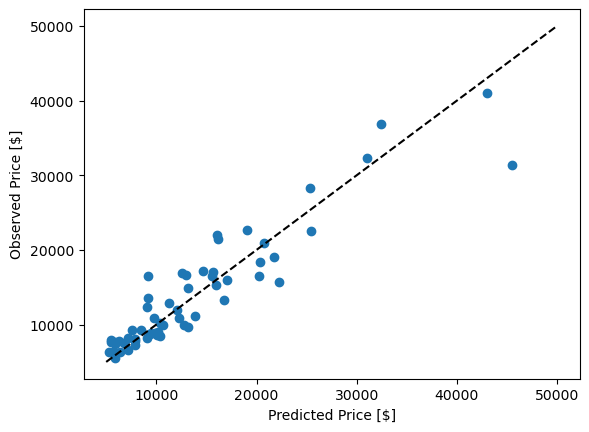

In [81]:
plot.scatter(test_predictions, Y_test)
plot.plot([5000, 50000], [5000, 50000], c='k', ls='--')
plot.xlabel('Predicted Price [$]')
plot.ylabel('Observed Price [$]')
plot.show()

## Scikit-Learn


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Test/Train Split

In [83]:
Y = carprice_df.price
X = carprice_df.drop(columns=['price'])

In [84]:
sk_X_train, sk_X_test, sk_Y_train, sk_Y_test = train_test_split(X, Y, test_size=0.3, random_state=99)

In [85]:
regressor = LinearRegression()  
regressor.fit(sk_X_train, sk_Y_train)

LinearRegression()

In [86]:
sk_intercept_carprice = regressor.intercept_
sk_engsize_coeffs = regressor.coef_
sk_ssr_carprice = np.sum((sk_Y_train-regressor.predict(sk_X_train))**2)

In [87]:
pd.Series(sk_engsize_coeffs, index=sk_X_train.columns)

symboling                  252.334986
wheelbase                   74.129758
carheight                   83.090197
curbweight                   4.839412
enginesize                 171.517234
boreratio                -5949.062573
stroke                   -6214.262410
horsepower                  22.177987
peakrpm                      2.154338
citympg                     42.120918
fueltype_gas             -1110.769127
aspiration_turbo          2083.399192
doornumber_two             -66.714720
carbody_hardtop          -2879.089218
carbody_hatchback        -2613.058557
carbody_sedan            -1980.959589
carbody_wagon            -3223.606531
drivewheel_rwd             210.926216
enginelocation_rear       8110.261998
enginetype_dohcv          1368.411791
enginetype_l               471.764375
enginetype_ohc            4039.235519
enginetype_ohcf           2413.522575
enginetype_ohcv          -2760.029705
cylindernumber_five      -1192.808616
cylindernumber_four      -1295.217999
cylindernumb

In [88]:
print('The intercept value is {:.1f}'.format(sk_intercept_carprice))
print('The sum of square residuals is {:.1f}'.format(sk_ssr_carprice))

The intercept value is -5972.4
The sum of square residuals is 496875718.4
